In [ ]:
pip install opendatasets

In [ ]:
import opendatasets as od

In [ ]:
od.download("https://www.kaggle.com/datasets/jihyeseo/online-retail-data-set-from-uci-ml-repo/code")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: abc
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/jihyeseo/online-retail-data-set-from-uci-ml-repo


100%|██████████| 21.8M/21.8M [00:00<00:00, 83.1MB/s]


In [ ]:
import os

In [ ]:
os.listdir()

['.config', 'online-retail-data-set-from-uci-ml-repo', 'sample_data']

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns

from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings("ignore")

In [ ]:
pip install openpyxl

In [ ]:
df = pd.read_excel('/content/online-retail-data-set-from-uci-ml-repo/Online Retail.xlsx')

In [ ]:

import opendatasets as od
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import warnings

# Install necessary libraries
!pip install opendatasets
!pip install openpyxl

# Download the dataset
od.download("https://www.kaggle.com/datasets/jihyeseo/online-retail-data-set-from-uci-ml-repo/code")

# Find the correct path to the Excel file
# The downloaded dataset may be in a subdirectory
for root, dirs, files in os.walk("."):  # Walk through the current directory and its subdirectories
    if "Online Retail.xlsx" in files:
        filepath = os.path.join(root, "Online Retail.xlsx")
        print(f"Found the Excel file at: {filepath}")
        df = pd.read_excel(filepath)
        break  # Stop searching once the file is found
else:  # If the loop finishes without finding the file
    print("Error: 'Online Retail.xlsx' not found in the downloaded dataset.")


warnings.filterwarnings("ignore")

# Now you can work with the DataFrame 'df'
# ... rest of your code

Skipping, found downloaded files in "./online-retail-data-set-from-uci-ml-repo" (use force=True to force download)
Found the Excel file at: ./online-retail-data-set-from-uci-ml-repo/Online Retail.xlsx


In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [ ]:
df = df[df['Quantity']>0]

In [ ]:
df['Country'].value_counts()

,count
Country,
United Kingdom,486286
Germany,9042
France,8408
EIRE,7894
Spain,2485
Netherlands,2363
Belgium,2031
Switzerland,1967
Portugal,1501


In [ ]:
df = df[df['Country'] == 'United Kingdom']

In [ ]:
df.isnull().value_counts()

InvoiceNo  StockCode  Description  Quantity  InvoiceDate  UnitPrice  CustomerID  Country
False      False      False        False     False        False      False       False      354345
                                                                     True        False      131349
                      True         False     False        False      True        False         592
Name: count, dtype: int64

In [ ]:
df = df.dropna()

In [ ]:
df.shape

(354345, 8)

In [ ]:
df['Amount'] = df['Quantity']*df['UnitPrice']

In [ ]:
df = df[df['InvoiceDate']>= "2010-12-09"]
df.shape

(342478, 9)

In [ ]:
print("Number of transactions: ", df['InvoiceNo'].nunique())
print("Number of products bought: ",df['StockCode'].nunique())
print("Number of customers:", df['CustomerID'].nunique() )
print("Percentage of customers NA: ", round(df['CustomerID'].isnull().sum() * 100 / len(df),2),"%" )

Number of transactions:  16017
Number of products bought:  3611
Number of customers: 3863
Percentage of customers NA:  0.0 %


In [ ]:
monetary = df.groupby('CustomerID')['Amount'].sum()
monetary = monetary.reset_index()
monetary.head()

,CustomerID,Amount
0,12346.0,77183.60
1,12747.0,3837.45
2,12748.0,31854.58
3,12749.0,4090.88
4,12820.0,942.34


In [ ]:
df['InvoiceDate'].max()

In [ ]:
now = dt.date(2011,12,9)
print(now)

2011-12-09


In [ ]:
df['date'] = pd.DatetimeIndex(df['InvoiceDate']).date

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,date
19632,537879,22114,HOT WATER BOTTLE TEA AND SYMPATHY,12,2010-12-09 08:34:00,3.95,14243.0,United Kingdom,47.4,2010-12-09
19633,537879,22835,HOT WATER BOTTLE I AM SO POORLY,8,2010-12-09 08:34:00,4.65,14243.0,United Kingdom,37.2,2010-12-09
19634,537879,85150,LADIES & GENTLEMEN METAL SIGN,6,2010-12-09 08:34:00,2.55,14243.0,United Kingdom,15.3,2010-12-09
19635,537879,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,4,2010-12-09 08:34:00,7.95,14243.0,United Kingdom,31.8,2010-12-09
19636,537879,21524,DOORMAT SPOTTY HOME SWEET HOME,2,2010-12-09 08:34:00,7.95,14243.0,United Kingdom,15.9,2010-12-09


In [ ]:
recency_df = df.groupby(by='CustomerID', as_index=False)['date'].max()
recency_df.columns = ['CustomerID','LastPurshaceDate']
recency_df.head()

,CustomerID,LastPurshaceDate
0,12346.0,2011-01-18
1,12747.0,2011-12-07
2,12748.0,2011-12-09
3,12749.0,2011-12-06
4,12820.0,2011-12-06


In [ ]:
recency_df['Recency'] = recency_df['LastPurshaceDate'].apply(lambda x: (now - x).days)
recency_df.head()

,CustomerID,LastPurshaceDate,Recency
0,12346.0,2011-01-18,325
1,12747.0,2011-12-07,2
2,12748.0,2011-12-09,0
3,12749.0,2011-12-06,3
4,12820.0,2011-12-06,3


In [ ]:
recency_df.drop('LastPurshaceDate',axis=1,inplace=True)

In [ ]:
recency_df.head()

,CustomerID,Recency
0,12346.0,325
1,12747.0,2
2,12748.0,0
3,12749.0,3
4,12820.0,3


In [ ]:
dfc = df
dfc.drop_duplicates(subset=['InvoiceNo', 'CustomerID'], keep="first", inplace=True)
frequency_df = dfc.groupby(by=['CustomerID'], as_index=False)['InvoiceNo'].count()
frequency_df.columns = ['CustomerID','Frequency']
frequency_df.head()

,CustomerID,Frequency
0,12346.0,1
1,12747.0,10
2,12748.0,196
3,12749.0,5
4,12820.0,4


In [ ]:
df['TotalCost'] = df['Quantity'] * df['UnitPrice']

In [ ]:
monetary_df = df.groupby(by='CustomerID',as_index=False).agg({'TotalCost': 'sum'})
monetary_df.columns = ['CustomerID','Monetary']
monetary_df.head()

,CustomerID,Monetary
0,12346.0,77183.60
1,12747.0,658.89
2,12748.0,3739.23
3,12749.0,98.35
4,12820.0,58.20


In [ ]:
temp_df = recency_df.merge(frequency_df,on='CustomerID')
temp_df.head()

,CustomerID,Recency,Frequency
0,12346.0,325,1
1,12747.0,2,10
2,12748.0,0,196
3,12749.0,3,5
4,12820.0,3,4


In [ ]:
rfm_df = temp_df.merge(monetary_df,on='CustomerID')
rfm_df.set_index('CustomerID',inplace=True)
rfm_df.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,325,1,77183.60
12747.0,2,10,658.89
12748.0,0,196,3739.23
12749.0,3,5,98.35
12820.0,3,4,58.20


In [ ]:
quantiles = rfm_df.quantile(q=[0.25,0.5,0.75])
quantiles

,Recency,Frequency,Monetary
0.25,17.0,1.0,17.4
0.50,49.0,2.0,45.0
0.75,134.0,5.0,121.6


In [ ]:
quantiles.to_dict()

{'Recency': {0.25: 17.0, 0.5: 49.0, 0.75: 134.0},
 'Frequency': {0.25: 1.0, 0.5: 2.0, 0.75: 5.0},
 'Monetary': {0.25: 17.4, 0.5: 45.0, 0.75: 121.60000000000001}}

In [ ]:
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4

In [ ]:
rfm_segmentation = rfm_df
rfm_segmentation['R_Quartile'] = rfm_segmentation['Recency'].apply(RScore, args=('Recency',quantiles,))
rfm_segmentation['F_Quartile'] = rfm_segmentation['Frequency'].apply(FMScore, args=('Frequency',quantiles,))
rfm_segmentation['M_Quartile'] = rfm_segmentation['Monetary'].apply(FMScore, args=('Monetary',quantiles,))

In [ ]:
rfm_segmentation.head()

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile
CustomerID,,,,,,
12346.0,325,1,77183.60,1,1,4
12747.0,2,10,658.89,4,4,4
12748.0,0,196,3739.23,4,4,4
12749.0,3,5,98.35,4,3,3
12820.0,3,4,58.20,4,3,3


In [ ]:
rfm_segmentation['RFMScore'] = rfm_segmentation.R_Quartile.map(str) \
                            + rfm_segmentation.F_Quartile.map(str) \
                            + rfm_segmentation.M_Quartile.map(str)
rfm_segmentation.head()

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore
CustomerID,,,,,,,
12346.0,325,1,77183.60,1,1,4,114
12747.0,2,10,658.89,4,4,4,444
12748.0,0,196,3739.23,4,4,4,444
12749.0,3,5,98.35,4,3,3,433
12820.0,3,4,58.20,4,3,3,433


In [ ]:
rfm_segmentation[rfm_segmentation['RFMScore']=='444'].sort_values('Monetary', ascending=False).head(10)

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore
CustomerID,,,,,,,
18102.0,0,57,39646.45,4,4,4,444
17949.0,1,44,28685.69,4,4,4,444
17450.0,8,44,25953.51,4,4,4,444
16013.0,3,45,17163.28,4,4,4,444
16333.0,7,22,14418.96,4,4,4,444
15769.0,7,25,11660.84,4,4,4,444
12901.0,8,28,9230.45,4,4,4,444
13798.0,1,56,7786.26,4,4,4,444
16684.0,4,28,7700.08,4,4,4,444


In [ ]:
print("Best Customers: ",len(rfm_segmentation[rfm_segmentation['RFMScore']=='444']))
print('Loyal Customers: ',len(rfm_segmentation[rfm_segmentation['F_Quartile']==4]))
print("Big Spenders: ",len(rfm_segmentation[rfm_segmentation['M_Quartile']==4]))
print('Almost Lost: ', len(rfm_segmentation[rfm_segmentation['RFMScore']=='244']))
print('Lost Customers: ',len(rfm_segmentation[rfm_segmentation['RFMScore']=='144']))
print('Lost Cheap Customers: ',len(rfm_segmentation[rfm_segmentation['RFMScore']=='111']))

Best Customers:  356
Loyal Customers:  752
Big Spenders:  966
Almost Lost:  64
Lost Customers:  9
Lost Cheap Customers:  353


In [ ]:
from scipy import stats

In [ ]:
def check_skew(df_skew, column):
    skew = stats.skew(df_skew[column])
    skewtest = stats.skewtest(df_skew[column])
    plt.title('Distribution of ' + column)
    sns.distplot(df_skew[column])
    print("{}'s: Skew: {}, : {}".format(column, skew, skewtest))
    return

Monetary's: Skew: 40.141126494255914, : SkewtestResult(statistic=95.4610898814839, pvalue=0.0)


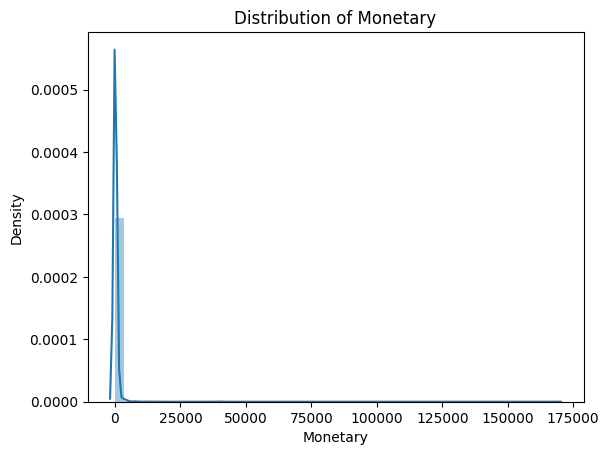

In [ ]:
check_skew(rfm_segmentation, 'Monetary')

Recency's: Skew: 1.2351646996911168, : SkewtestResult(statistic=24.969222508814525, pvalue=1.3206030758290934e-137)


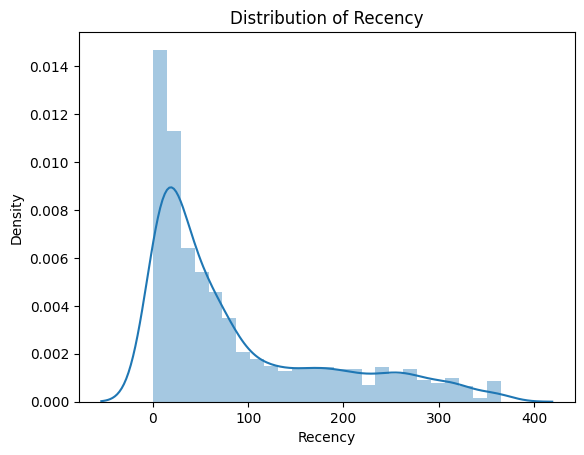

In [ ]:
check_skew(rfm_segmentation, 'Recency')

Frequency's: Skew: 10.472178631434598, : SkewtestResult(statistic=67.51778634827684, pvalue=0.0)


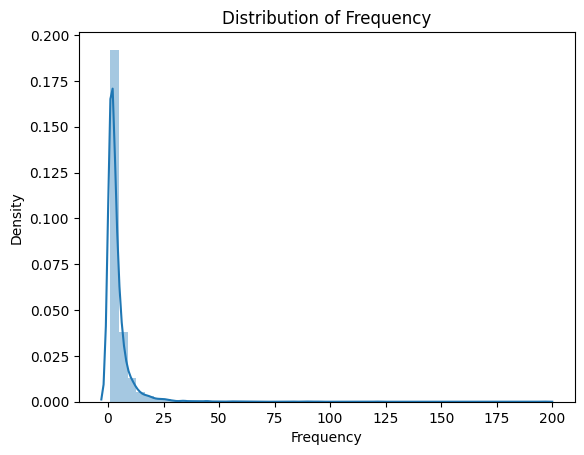

In [ ]:
check_skew(rfm_segmentation, 'Frequency')

In [ ]:
 df_rfm_log = rfm_segmentation[['Recency', 'Frequency', 'Monetary']]

In [ ]:
df_rfm_log.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,325,1,77183.60
12747.0,2,10,658.89
12748.0,0,196,3739.23
12749.0,3,5,98.35
12820.0,3,4,58.20


Recency's: Skew: -0.4710808387768466, : SkewtestResult(statistic=-11.398176271020318, pvalue=4.2696957012161874e-30)


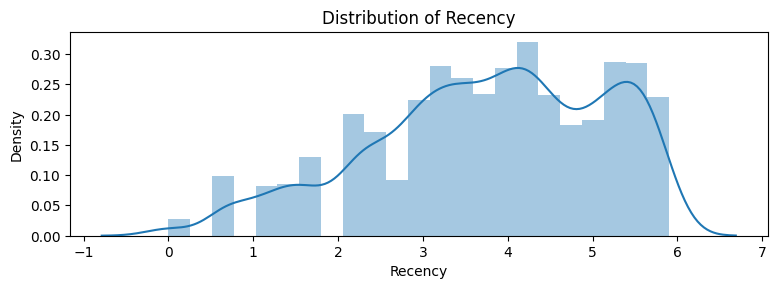

In [ ]:
df_rfm_log['Recency'] = np.log(df_rfm_log['Recency']+1)
plt.figure(figsize=(9, 9))
plt.subplot(3, 1, 1)
check_skew(df_rfm_log,'Recency')

Frequency's: Skew: 1.1866410090585382, : SkewtestResult(statistic=24.278138639509407, pvalue=3.3367494424418646e-130)


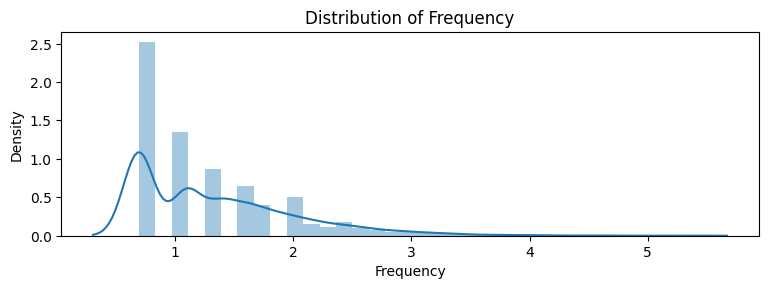

In [ ]:
df_rfm_log['Frequency'] = np.log(df_rfm_log['Frequency']+1)
plt.figure(figsize=(9, 9))
plt.subplot(3, 1, 1)
check_skew(df_rfm_log,'Frequency')

Monetary's: Skew: 0.5650046851800273, : SkewtestResult(statistic=13.415978527481231, pvalue=4.874562394870637e-41)


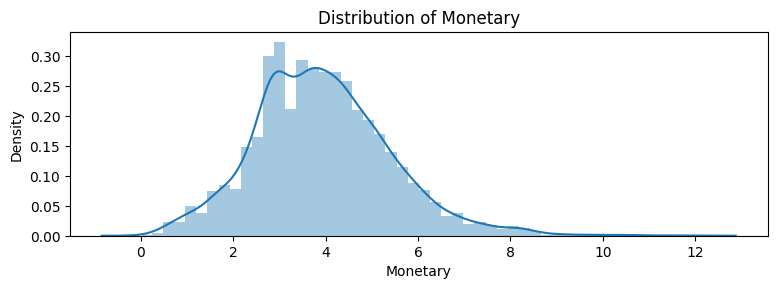

In [ ]:
df_rfm_log['Monetary'] = np.log(df_rfm_log['Monetary']+1)
plt.figure(figsize=(9, 9))
plt.subplot(3, 1, 1)
check_skew(df_rfm_log,'Monetary')

In [ ]:
scaler = StandardScaler()
scaler.fit(df_rfm_log)
RFM_Table_scaled = scaler.transform(df_rfm_log)

In [ ]:
RFM_Table_scaled = pd.DataFrame(RFM_Table_scaled, columns = df_rfm_log.columns)

In [ ]:
RFM_Table_scaled = RFM_Table_scaled.set_index(df_rfm_log.index)

In [ ]:
RFM_Table_scaled.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,1.477165,-0.951360,4.986533
12747.0,-1.950830,1.576889,1.744171
12748.0,-2.754117,5.855984,2.925415
12749.0,-1.740482,0.677952,0.454941
12820.0,-1.740482,0.407557,0.102420


In [ ]:
from scipy.spatial.distance import cdist
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1,10)

for k in K:
    #Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(RFM_Table_scaled)
    kmeanModel.fit(RFM_Table_scaled)

    distortions.append(sum(np.min(cdist(RFM_Table_scaled, kmeanModel.cluster_centers_,
                      'euclidean'),axis=1)) / RFM_Table_scaled.shape[0])
    inertias.append(kmeanModel.inertia_)

    mapping1[k] = sum(np.min(cdist(RFM_Table_scaled, kmeanModel.cluster_centers_,
                 'euclidean'),axis=1)) / RFM_Table_scaled.shape[0]
    mapping2[k] = kmeanModel.inertia_

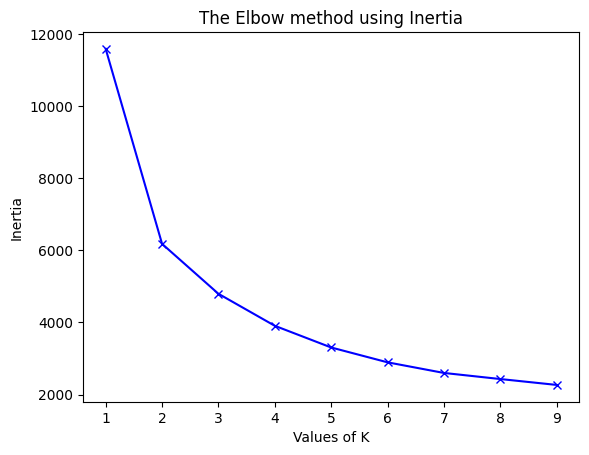

In [ ]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow method using Inertia')
plt.show()

In [ ]:
from sklearn.manifold import TSNE

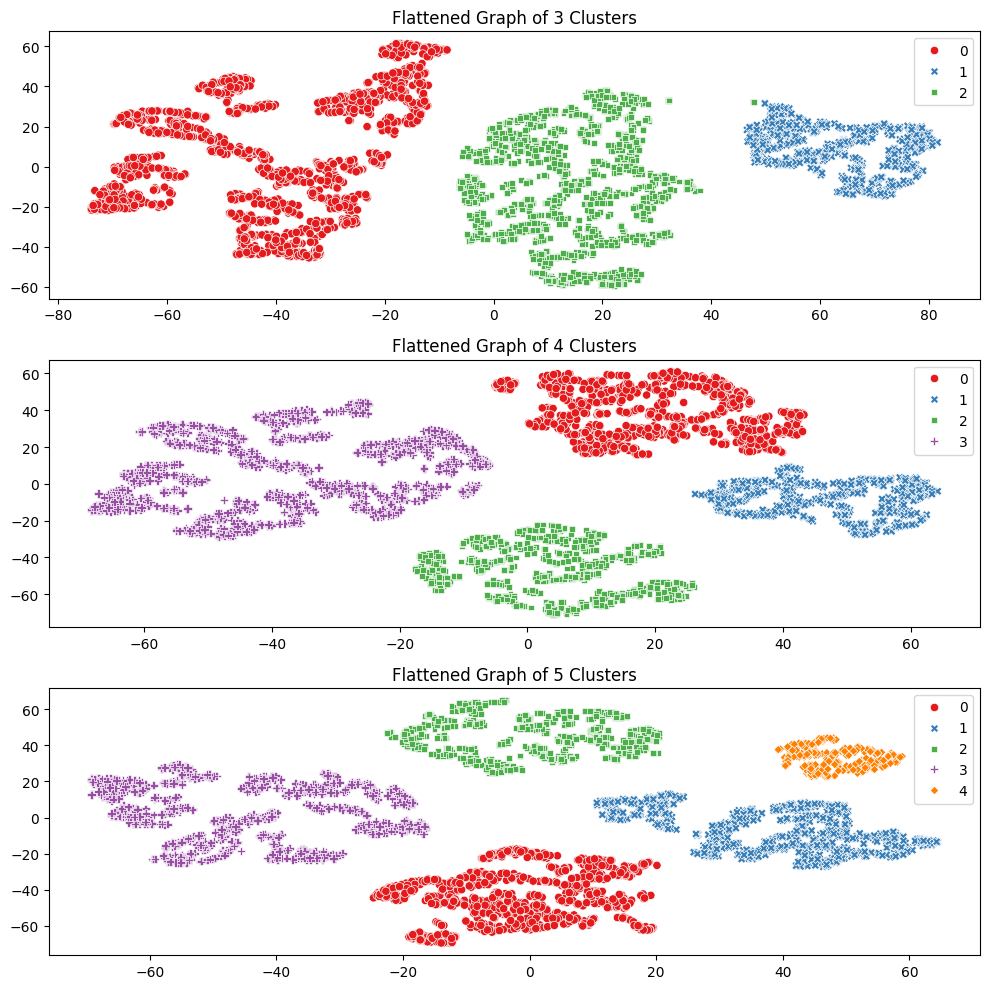

In [ ]:
def kmeans(normalised_df_rfm, clusters_number, original_df_rfm):

    kmeans = KMeans(n_clusters = clusters_number, random_state = 1)
    kmeans.fit(normalised_df_rfm)

    cluster_labels = kmeans.labels_


    df_new = original_df_rfm.assign(Cluster = cluster_labels)


    model = TSNE(random_state=1)
    transformed = model.fit_transform(df_new)


    plt.title('Flattened Graph of {} Clusters'.format(clusters_number))
    sns.scatterplot(x=transformed[:,0], y=transformed[:,1], hue=cluster_labels, style=cluster_labels, palette="Set1")

    return df_new
plt.figure(figsize=(10, 10))
plt.subplot(3, 1, 1)
df_rfm_k3 = kmeans(RFM_Table_scaled, 3, df_rfm_log)
plt.subplot(3, 1, 2)
df_rfm_k4 = kmeans(RFM_Table_scaled, 4, df_rfm_log)
plt.subplot(3, 1, 3)
df_rfm_k5 = kmeans(RFM_Table_scaled, 5, df_rfm_log)
plt.tight_layout()

In [ ]:
df_rfm_k3.head()

,Recency,Frequency,Monetary,Cluster
CustomerID,,,,
12346.0,5.786897,0.693147,11.253955,2
12747.0,1.098612,2.397895,6.492073,1
12748.0,0.000000,5.283204,8.226902,1
12749.0,1.386294,1.791759,4.598649,1
12820.0,1.386294,1.609438,4.080922,2


In [ ]:
def rfm_values(df):
    df_new = df.groupby(['Cluster']).agg({
        'Recency': 'mean',
        'Frequency': 'mean',
        'Monetary': ['mean', 'count']
    }).round(0)

    return df_new

In [ ]:
rfm_values(df_rfm_k3)

Recency Frequency Monetary      
           mean      mean     mean count
Cluster                                 
0           5.0       1.0      3.0  1656
1           2.0       2.0      6.0   670
2           3.0       1.0      4.0  1537

In [ ]:
rfm_values(df_rfm_k4)

Recency Frequency Monetary      
           mean      mean     mean count
Cluster                                 
0           4.0       1.0      5.0   954
1           2.0       2.0      6.0   625
2           3.0       1.0      4.0   849
3           5.0       1.0      3.0  1435

In [ ]:
rfm_values(df_rfm_k5)

Recency Frequency Monetary      
           mean      mean     mean count
Cluster                                 
0           5.0       1.0      5.0   930
1           3.0       2.0      5.0   823
2           3.0       1.0      3.0   748
3           5.0       1.0      3.0  1076
4           2.0       3.0      7.0   286

In [ ]:
!pip install surprise pandas scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 2.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357272 sha256=37858c90ee53cf78ce1b8e5b4bd3beda3b6ef1bf9539fba1e57c2ff47bce30f1
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


In [ ]:
import pandas as pd
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split
from surprise import accuracy

In [ ]:
data = {
    'user_id': [1, 1, 1, 2, 2, 3, 3, 4, 4],
    'product_id': ['A', 'B', 'C', 'B', 'D', 'A', 'D', 'C', 'E'],
    'rating': [5, 4, 2, 3, 5, 4, 5, 2, 3]
}

df = pd.DataFrame(data)
print(df)


   user_id product_id  rating
0        1          A       5
1        1          B       4
2        1          C       2
3        2          B       3
4        2          D       5
5        3          A       4
6        3          D       5
7        4          C       2
8        4          E       3


In [ ]:
data = {
    'user_id': [1, 1, 1, 2, 2, 3, 3, 4, 4],
    'product_id': ['A', 'B', 'C', 'B', 'D', 'A', 'D', 'C', 'E'],
    'rating': [5, 4, 2, 3, 5, 4, 5, 2, 3]
}

df = pd.DataFrame(data)
print(df)

   user_id product_id  rating
0        1          A       5
1        1          B       4
2        1          C       2
3        2          B       3
4        2          D       5
5        3          A       4
6        3          D       5
7        4          C       2
8        4          E       3


In [ ]:
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df[['user_id', 'product_id', 'rating']], reader)

In [ ]:
trainset, testset = train_test_split(data, test_size=0.2)

In [ ]:
svd = SVD()
svd.fit(trainset)

In [ ]:
predictions = svd.test(testset)
# Calculating RMSE
rmse = accuracy.rmse(predictions)
print(f'RMSE: {rmse}')

RMSE: 1.1148
RMSE: 1.1147827829002683


In [ ]:
# Get top 3 recommended products for all users
top_n = get_top_n(predictions, n=3)

# Display recommendations for all users
for user_id, recommendations in top_n.items():
    print(f"Recommendations for user {user_id}:")
    for product, score in recommendations:
        print(f"  Product: {product}, Predicted Rating: {score:.2f}")
    print()


Recommendations for user 1:
  Product: A, Predicted Rating: 3.59

Recommendations for user 2:
  Product: B, Predicted Rating: 3.71

